Ces déclarations sont obligatoires, il faut les copier coller dans chaque nouveau document et les exécuter (Shift + Return) au début

In [55]:
%matplotlib inline
import imp
from matplotlib import pyplot as plt
import math

In [56]:
import premier_jet as pj

([0.5, 1], [1.866, 2.366])


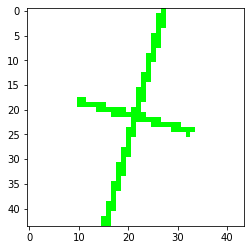

In [57]:
def transforme_point(p, origine, vecteur_x, vecteur_y):
    return [origine[0] + vecteur_x[0] * p[0] + vecteur_y[0] * p[1],
            origine[1] + vecteur_x[1] * p[0] + vecteur_y[1] * p[1]]

def escher_segments(s, epaisseur, rgba):
    def _(origine, vecteur_x, vecteur_y):
        return pj.multi_segments([[transforme_point(p, origine, vecteur_x, vecteur_y),
                                   transforme_point(q, origine, vecteur_x, vecteur_y)]
                                  for p, q in s],
                                epaisseur,
                                rgba)
    return _

def montre_escher(image_escher, origine, vecteur_x, vecteur_y, resolution):
    coins = [origine, *(transforme_point(v, origine, vecteur_x, vecteur_y) for v in ([0, 1], [1, 0], [1, 1]))]
    coin_inferieur = [min(v[idx] for v in coins) for idx in range(2)]
    coin_superieur = [max(v[idx] for v in coins) for idx in range(2)]
    # coin_superieur_x, coin_superieur_y = transforme_point([1, 1], origine, vecteur_x, vecteur_y)
    print((coin_inferieur, coin_superieur))
    pj.montre(image_escher(origine, vecteur_x, vecteur_y),
              coin_inferieur,
              coin_superieur,
              resolution)
    
montre_escher(escher_segments([[[0, 0], [1, 1]], [[0.25, 0.75], [0.75, 0.25]]], 0.05, [0.0, 1.0, 0.0, 1.0]),
              [1, 1],
              [0.866, 0.5],
              [-0.5, 0.866],
              32)

In [58]:
def tour_90_a_gauche(image):
    # rot dans https://eprints.soton.ac.uk/257577/1/funcgeo2.pdf
    def _(a, b, c):
        return image(additionne_vecteurs(a, b), c, echelonne_vecteur(b, -1))
    return _
def symetrie_axe_vertical(image):
    # flip dans https://eprints.soton.ac.uk/257577/1/funcgeo2.pdf
    def _(a, b, c):
        return image(additionne_vecteurs(a, b), echelonne_vecteur(b, -1), c)
    return _
def empile(au_dessus, en_dessous, m=1, n=1):
    limite = n / (m + n)
    colimite = m / (m + n)
    def _(x, y):
        if y > limite:
            return au_dessus(x, (y - limite) / colimite)
        else:
            return en_dessous(x, y / limite)
    return _
def echelonne_vecteur(v, facteur):
    return [x * facteur for x in v]
def additionne_vecteurs(a, b):
    return [a[idx] + b[idx] for idx in range(len(a))]
def union_segments(i1, j2):
    return i1 + j2
def union_images(i1, j2):
    def _(a, b, c):
        return i1(a, b, c) + j2(a, b, c)
    return _
def a_cote(gauche, droite, m=1, n=1):
    def _(a, b, c):
        b1 = echelonne_vecteur(b, m / (m + n))
        return union_segments(gauche(a, b1, c),
                              droite(additionne_vecteurs(a, b1), 
                                     echelonne_vecteur(b, n / (m + n)),
                                     c))
    return _
def au_dessus(au_dessus, en_dessous, m=1, n=1):
    def _(a, b, c):
        c1 = echelonne_vecteur(c, m / (m + n))
        return union_segments(en_dessous(a, b, c1),
                              au_dessus(additionne_vecteurs(a, c1), b, echelonne_vecteur(c, n / (m + n))))
    return _
def tour_45_a_gauche(image):
    def _(a, b, c):
        b_plus_c_demi = echelonne_vecteur(additionne_vecteurs(b, c), 0.5)
        return image(additionne_vecteurs(a, b_plus_c_demi),
                     b_plus_c_demi,
                     echelonne_vecteur(additionne_vecteurs(echelonne_vecteur(b, -1), c), 0.5))
    return _
#ii = pj.multi_segments(r, 0.025, [0.1, 0.1, 0.1, 1.0])
#pj.montre(empile(a_cote(ii, ii, m=0.5), ii, 2, 1), [0, 0], [1, 1], 128)

Les coordonnes ont ete copiees de [ce site](https://blogs.msdn.microsoft.com/satnam_singh/2010/01/05/an-f-functional-geometry-description-of-eschers-fish/):

In [59]:
def transforme_coordonnees_satnam_singh(xxx):
    coordonnees = [[[x1 / 16, y1 / 16], [x2 / 16, y2 / 16]] for (x1, y1), (x2, y2) in xxx]
    def applique_transformation(v, a, b, c):
        return additionne_vecteurs(a, 
                                   additionne_vecteurs(echelonne_vecteur(b, v[0]),
                                                       echelonne_vecteur(c, v[1])))
    def _(a, b, c):
        return [[applique_transformation(v, a, b, c), applique_transformation(w, a, b, c)]
                for v, w in coordonnees]
    return _

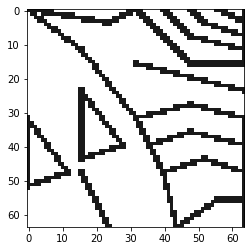

In [60]:
p = transforme_coordonnees_satnam_singh(
     [(( 4,  4), ( 6,  0)), (( 0,  3),  (3,  4)), (( 3,  4), ( 0,  8)),
      (( 0,  8), ( 0,  3)), (( 4,  5), ( 7,  6)), (( 7,  6), ( 4, 10)),
      (( 4, 10), ( 4,  5)), ((11,  0), (10,  4)), ((10,  4), ( 8,  8)),
      (( 8,  8), ( 4, 13)), (( 4, 13), ( 0, 16)), ((11,  0), (14,  2)),
      ((14,  2), (16,  2)), ((10,  4), (13,  5)), ((13,  5), (16,  4)),
      (( 9,  6), (12,  7)), ((12,  7), (16,  6)), (( 8,  8), (12,  9)),
      ((12,  9), (16,  8)), (( 8, 12), (16, 10)), (( 0, 16), ( 6, 15)),
      (( 6, 15), ( 8, 16)), (( 8, 16), (12, 12)), ((12, 12), (16, 12)),
      ((10, 16), (12, 14)), ((12, 14), (16, 13)), ((12, 16), (13, 15)),
      ((13, 15), (16, 14)), ((14, 16), (16, 15)),
      ((16,  0), (16,  8)), ((16, 12), (16, 16))])
pj.montre(pj.multi_segments(p([0, 0], [1, 0], [0, 1]), 0.025, [0.1, 0.1, 0.1, 1.0]), [0, 0], [1, 1], 64)

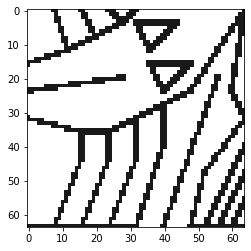

In [61]:
q = transforme_coordonnees_satnam_singh(
     [(( 2,  0), ( 4,  5)), (( 4,  5), ( 4,  7)), (( 4,  0), ( 6,  5)),
      (( 6,  5), ( 6,  7)), (( 6,  0), ( 8,  5)), (( 8,  5), ( 8,  8)),
      (( 8,  0), (10,  6)), ((10,  6), (10,  9)), ((10,  0), (14, 11)),
      ((12,  0), (13,  4)), ((13,  4), (16,  8)), ((16,  8), (15, 10)),
      ((15, 10), (16, 16)), ((16, 16), (12, 10)), ((12, 10), ( 6,  7)),
      (( 6,  7), ( 4,  7)), (( 4,  7), ( 0,  8)), ((13,  0), (16,  6)),
      ((14,  0), (16,  4)), ((15,  0), (16,  2)), (( 0, 10), ( 7, 11)),
      (( 9, 12), (10, 10)), ((10, 10), (12, 12)), ((12, 12), ( 9, 12)),
      (( 8, 15), ( 9, 13)), (( 9, 13), (11, 15)), ((11, 15), ( 8, 15)),
      (( 0, 12), ( 3, 13)), (( 3, 13), ( 7, 15)), (( 7, 15), ( 8, 16)),
      (( 2, 16), ( 3, 13)), (( 4, 16), ( 5, 14)), (( 6, 16), ( 7, 15)),
      (( 0,  0), ( 8,  0)), ((12,  0), (16,  0))])
pj.montre(pj.multi_segments(q([0, 0], [1, 0], [0, 1]), 0.025, [0.1, 0.1, 0.1, 1.0]), [0, 0], [1, 1], 64)

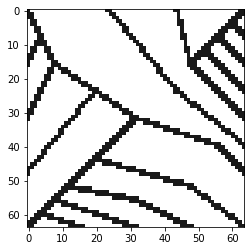

In [62]:
r = transforme_coordonnees_satnam_singh(
     [(( 0, 12), ( 1, 14)), (( 0,  8), ( 2, 12)), (( 0,  4), ( 5, 10)),
      (( 0,  0), ( 8,  8)), (( 1,  1), ( 4,  0)), (( 2,  2), ( 8,  0)),
      (( 3,  3), ( 8 , 2)), (( 8,  2), (12,  0)), (( 5,  5), (12,  3)),
      ((12,  3), (16,  0)), (( 0, 16), ( 2, 12)), (( 2, 12), ( 8,  8)),
      (( 8,  8), (14,  6)), ((14,  6), (16,  4)), (( 6, 16), (11, 10)),
      ((11, 10), (16,  6)), ((11, 16), (12, 12)), ((12, 12), (16,  8)),
      ((12, 12), (16, 16)), ((13, 13), (16, 10)), ((14, 14), (16, 12)),
      ((15, 15), (16, 14))])
pj.montre(pj.multi_segments(r([0, 0], [1, 0], [0, 1]), 0.025, [0.1, 0.1, 0.1, 1.0]), [0, 0], [1, 1], 64)

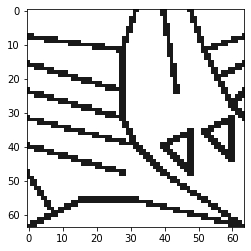

In [63]:
s = transforme_coordonnees_satnam_singh(
     [(( 0,  0), ( 4,  2)), (( 4,  2), ( 8,  2)), (( 8,  2), (16,  0)),
      (( 0,  4), ( 2,  1)), (( 0,  6), ( 7,  4)), (( 0,  8), ( 8,  6)),
      (( 0, 10), ( 7,  8)), (( 0, 12), ( 7, 10)), (( 0, 14), ( 7, 13)),
      (( 8, 16), ( 7, 13)), (( 7, 13), ( 7,  8)), (( 7,  8), ( 8,  6)),
      (( 8,  6), (10,  4)), ((10,  4), (16,  0)), ((10, 16), (11, 10)),
      ((10,  6), (12,  4)), ((12,  4), (12,  7)), ((12,  7), (10,  6)),
      ((13,  7), (15,  5)), ((15,  5), (15,  8)), ((15,  8), (13,  7)),
      ((12, 16), (13, 13)), ((13, 13), (15,  9)), ((15,  9), (16,  8)),
      ((13, 13), (16, 14)), ((14, 11), (16, 12)), ((15,  9), (16, 10))])
pj.montre(pj.multi_segments(s([0, 0], [1, 0], [0, 1]), 0.025, [0.1, 0.1, 0.1, 1.0]), [0, 0], [1, 1], 64)

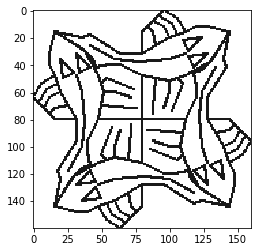

In [66]:
fish = transforme_coordonnees_satnam_singh([((x1 / 2, (y1 + 16) / 2), (x2 / 2, (y2 + 16) / 2)) for (x1, y1), (x2, y2) in
     [(( 4,  4), ( 6,  0)), (( 0,  3),  (3,  4)), (( 3,  4), ( 0,  8)),
      (( 0,  8), ( 0,  3)), (( 4,  5), ( 7,  6)), (( 7,  6), ( 4, 10)),
      (( 4, 10), ( 4,  5)), ((11,  0), (10,  4)), ((10,  4), ( 8,  8)),
      (( 8,  8), ( 7, 11)), (( 7, 11), ( 5, 13)), (( 5, 13), ( 0, 16)),
      ((11,  0), (14,  2)),
      ((14,  2), (16,  2)), ((10,  4), (13,  5)), ((13,  5), (16,  4)),
      (( 9,  6), (12,  7)), ((12,  7), (16,  6)), (( 8,  8), (12,  9)),
      ((12,  9), (16,  8)), ((16, 8), (16, 0)),
      (( 0, 16), (-1, 12)), ((-1, 12), (-2, 7)), ((-2, 7), (0,  0)),
      ((-4, -9), (-1, -2)), ((-1, -2), (1, -2)),
      ((-2, -10), (0, -6)), ((0, -6), (2, -4)), 
      ((-1, -13), (0, -12)), ((0, -12), (5, -6)),
      ((0, -16), (8, -8)), ((0, -16), (-8, -8)),
# ((1, -15), (4, -16)),
# ((2, -14), (8, -16)),
# ((3, -13), (8, -14)),
# ((8, -14), (12, -16)),
# ((5, -11), (12, -13)),
# ((12, -13), (16, -16)),
 
      ((0, 0), (2, -4)), ((2, -4), (8, -8)), ((8, -8), (14, -10)), ((14, -10), (16, -12)),
 ((6, 0), (11, -6)), ((11, -6), (16, -10)), ((11, 0), (12, -4)), ((12, -4), (16, -8)),
 ((12, -4), (16, 0)),
      
      ((18, -15), (20, -14)), ((20, -14), (24, -14)), ((24, -14), (32, -16)),
 ((16, -12), (18, -15)), ((16, -10), (23, -12)), ((16, -8), (25, -10)), ((25, -10), (26, -12)),
 ((26, -12), (32, -16)),
     ]])
#fish = transforme_coordonnees_satnam_singh([((0, 0), (16, 0)), ((16, 0), (4, 12)), ((4, 12), (0, 12))])
fish2 = symetrie_axe_vertical(tour_45_a_gauche(fish))
fish3 = tour_90_a_gauche(tour_90_a_gauche(tour_90_a_gauche(fish2)))
# 2 poissons: union_images(fish, tour_90_a_gauche(tour_90_a_gauche(fish)))
t = union_images(fish, union_images(fish2, fish3))
u = union_images(union_images(fish2, tour_90_a_gauche(fish2)),
                 union_images(tour_90_a_gauche(tour_90_a_gauche(fish2)),
                              tour_90_a_gauche(tour_90_a_gauche(tour_90_a_gauche(fish2)))))
pj.montre(pj.multi_segments(u([0, 0], [1, 0], [0, 1]), 1/64, [0.1, 0.1, 0.1, 1.0]), [-0.125, -0.125], [1.125, 1.125], 128)

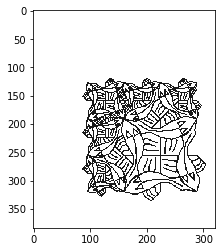

In [67]:
def blanc(_a, _b, _c):
    return []
def quartet(p, q, r, s):
    return au_dessus(a_cote(p, q), a_cote(r, s))
def cycle(p):
    q = tour_90_a_gauche(p)
    r = tour_90_a_gauche(q)
    s = tour_90_a_gauche(r)
    return quartet(p, s, q, r)
cote1 = quartet(blanc, blanc, tour_90_a_gauche(t), t)
cote2 = quartet(cote1, cote1, tour_90_a_gauche(t), t)
def cote(n):
    if n <= 0:
        return blanc
    else:
        return quartet(cote(n - 1), cote(n - 1), tour_90_a_gauche(t), t)
def coin(n):
    if n <= 0:
        return blanc
    else:
        cote_n_1 = cote(n - 1)
        return quartet(coin(n - 1), cote_n_1, tour_90_a_gauche(cote_n_1), u)
pj.montre(pj.multi_segments(coin(2)([0, 0], [1, 0], [0, 1]), 1/128, [0.1, 0.1, 0.1, 1.0]), [-0.125, -0.25], [1.125, 1.25], 256)

In [68]:
def nonet(p, q, r, s, t, u, v, w, x):
    return au_dessus(
        a_cote(p, a_cote(q, r), m=1, n=2),
        au_dessus(
              a_cote(s, a_cote(t, u), m=1, n=2),
              a_cote(v, a_cote(w, x), m=1, n=2)),
        m=2, n=1)

In [69]:
coin_0 = coin(2)
cote_0 = cote(2)
coin_90 = tour_90_a_gauche(coin_0)
cote_90 = tour_90_a_gauche(cote_0)
coin_180 = tour_90_a_gauche(coin_90)
cote_180 = tour_90_a_gauche(cote_90)
squarelimit2 = nonet(coin_0,  cote_0,   tour_90_a_gauche(coin_180),
                     cote_90, u,        tour_90_a_gauche(cote_180),
                     coin_90, cote_180, coin_180)

In [72]:
def squarelimit(n):
    coin_0 = coin(n)
    cote_0 = cote(n)
    coin_90 = tour_90_a_gauche(coin_0)
    cote_90 = tour_90_a_gauche(cote_0)
    coin_180 = tour_90_a_gauche(coin_90)
    cote_180 = tour_90_a_gauche(cote_90)
    return nonet(coin_0,  cote_0,   tour_90_a_gauche(coin_180),
                 cote_90, u,        tour_90_a_gauche(cote_180),
                 coin_90, cote_180, coin_180)
len(squarelimit(3)([0, 0], [1, 0], [0, 1]))

20188

In [54]:
pj.sauve('escher_fish_2.png', pj.multi_segments(squarelimit(2)([0, 0], [1, 0], [0, 1]), 1/512, [0.1, 0.1, 0.1, 1.0]), [-0.125, -0.25], [1.125, 1.25], 1024)